<a href="https://colab.research.google.com/github/carmeniturbe/credit_score/blob/main/Project_2_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning and Exploratory Data Analysis (EDA) for Credit Score Classification

#Introduction and Dataset Background

The objective of this report is to provide a detailed account of the data cleaning and exploratory data analysis (EDA) conducted on a dataset collected by a global finance company. The dataset contains essential bank details and credit-related information, with the aim of building an intelligent system for credit score classification.

The dataset initially featured various columns, each with unique characteristics and attributes. To prepare the data for analysis and model development, we performed a series of data cleaning steps and explored key insights.


#Data Cleaning Steps

##ID and Name Columns
These columns represented the name and the unique identification number of a client. We removed the "ID" and "Name" columns as they didn't contribute to the model.


##Customer_ID Column
Column description: Represents a unique identification of a person

This column was Initially used for filling missing values with a fuction we generated called "replace_missing_Values" (per customer ID backward fill, if not having value-> forward fill); we later removed this column after its purpose was fulfilled.

Below you'll find an example of the fuction used in the Payment_Behaviour column


In [ ]:
# replace method: per customer ID backward fill, if not having value-> forward fill.
def replace_missing_values(df, Payment_Behaviour, customer_id_col):
    df[Payment_Behaviour] = df.groupby(customer_id_col)[Payment_Behaviour].apply(lambda x: x.bfill().ffill())

##Month Column

Column Description: Represents the month of the year

We converted the "Month" column from object to integer by imputing the months with their respective numerical values. We discovered that the dataset uniformly represented 12,500 unique customer IDs each month, suggesting recurring interactions with this specific group of customers.


##Age Column
Column description: Represents the age of the person

We cleaned the "Age" column by removing non-numeric characters and replacing ages over 90 and under 10 with NaN. Missing values were imputed using customer IDs.

##SSN Column
Column description: Represents the social security number of a person

We deleted the "SSN" column, as it contained sensitive information irrelevant to our analysis.

##Occupation Column
Column description: Represents the occupation of the person

We replaced blank occupation values with NaN and filled missing values with random choices. Later, we used label encoding to convert this column into numerical format.

In [ ]:
# Replace the missing values in the "Occupation" column with random choices:

for i, value in enumerate(df["Occupation"]):
  availabe_categories = df["Occupation"].dropna().unique()
  if pd.isnull(value):  # Check if value is NaN
        random_choice = np.random.choice(availabe_categories)
        df.at[i, "Occupation"] = random_choice

##Annual_Income Column
Column description: Represents the annual income of the person

We removed non-numeric characters and changed the data type from integer to float. Outliers were retained, as the company's global nature resulted in varied income levels based on location and other factors.

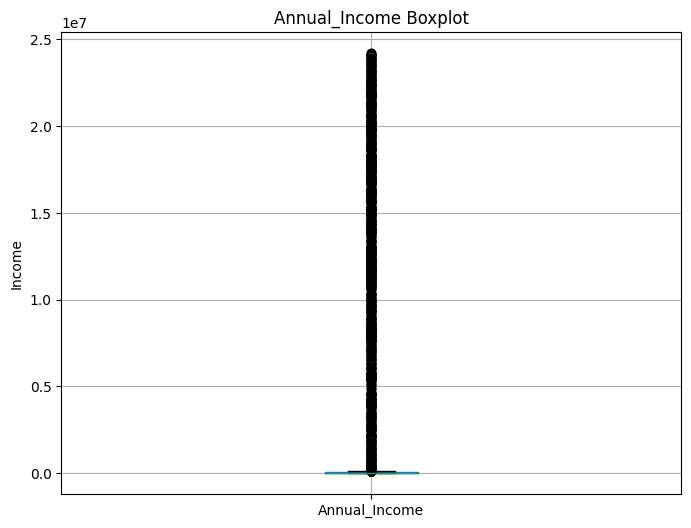

##Monthly_Inhand_Salary Column
Column description: Represents the monthly base salary of a person

We imputed missing values using customer IDs by applying the "replace_missing_Values" fuction and retained a few outliers due to global income variations.

##Num_Bank_Accounts Column
Column description: Represents the number of bank accounts a person holds

We treated negative values as zero and outliers by setting values over 10 to NaN, as they were considered unrealistic. We finalized by using the “replace_missing_values” function to replace the missing values using the customer ID (per customer ID backward fill, if not having value-> forward fill)


##Num_Credit_Card Column
Column description: Represents the number of other credit cards held by a person

Similar to bank accounts, we replaced values over 10 with NaN and used the “replace_missing_values” function.

##Interest_Rate Column
Column description: Represents the interest rate on credit card

Values over 48% were set to NaN, as they were considered invalid. Outliers were treated similarly with the "replace_missing_values" function.

##Num_of_Loan Column
Column description: Column description: Represents the number of loans taken from the bank

Values over 100 were set to NaN, and the column was later converted to categorical, creating a new column named "Loan_Category" to reduce the noise caused by the significant number of outliers.

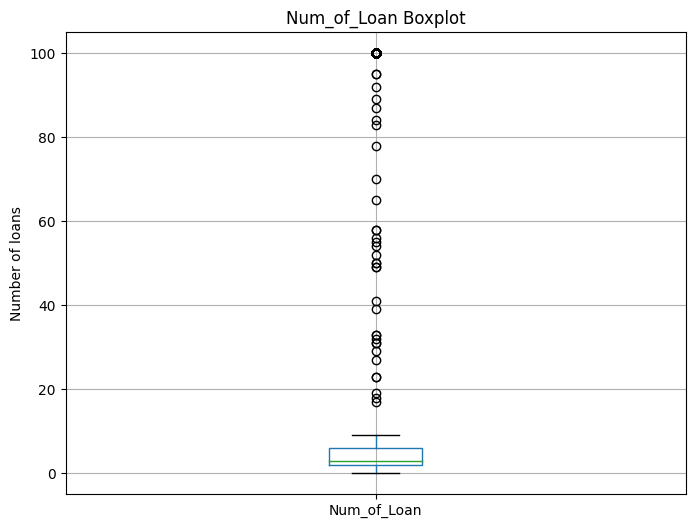

##Loan_Category Column

Column description: This is a categorical column created from the Num_of_Loan column and distributes the numbers of loans between Low, Medium and High.

This categorical column was converted to numerical format.

##Type_of_Loan:
Column description: Represents the types of loan taken by a person

We opted to eliminate the Type_of_Loan column due to its inherent complexity, coupled with its redundancy when compared to the Num_of_Loan column. This decision enables us to focus our resources on other aspects of the analysis while maintaining the overall quality and usability of our dataset.


##Delay_from_due_date
Column Description: Represents the average number of days delayed from the payment date

We had a couple negative values in this column but having a negative number didn’t make sense considering we’re talking about the number  of days delayed from the payment date. For that reason we decided to set negative values to zero

##Num_of_Delayed_Payment
Column description: Represents the average number of payments delayed by a person

Missing values were imputed using customer IDs, and the column was later eliminated to be replaced by a new column named "Delayed_Payment_Category" to reduce the noise caused by the outliers. We used percentiles for categorization as shown below:


In [ ]:
# We'll convert this column to categorical by using percentiles to reduce the noise caused by the outliers
# We'll Define percentiles for categorization
Q1 = df["Num_of_Delayed_Payment"].quantile(0.25)
Q3 = df["Num_of_Delayed_Payment"].quantile(0.75)

# We'll create a function to categorize the data
def categorize_loans(num_loans):
    if num_loans <= Q1:
        return "Low"
    elif Q1 < num_loans <= Q3:
        return "Medium"
    else:
        return "High"

# We'll apply the categorization function to create a new column
df["Delayed_Payment_Category"] = df["Num_of_Delayed_Payment"].apply(categorize_loans)

##Delayed_Payment_Category
Column description: This categorical column, derived from the "Num_of_Delayed_Payment" column, consists of three distinct categories (High, Medium, Low), each reflecting the level of loans acquired by a client

This categorical column was converted to numerical format.



##Changed_Credit_Limit:
Column description: Represents the percentage change in credit card limit

We treated missing values by replacing them with the mean and set negative values to NaN. Outliers were retained

##Num_Credit_Inquiries
Column description: Represents the number of credit card inquiries

We retained data below the mean and set higher values to NaN, as they appeared illogical. We proved the data was illogical by visualizing the behavior of the feature by clients by month. We took client CUS_0xa5f9 as an example. We generated a table that showed the number of credit inquiries for the client went from 12 in January to 1044 in february

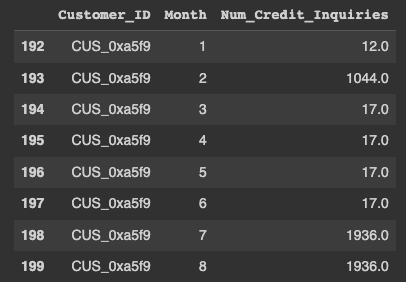

We replaced the missing values using the customer ID



##Credit_Mix column
Column description: Represents the classification of the mix of credits (Good, Bad and Standard)

We replaced "_" values with NaN and imputed missing values using customer IDs. The column was converted to numerical format.

##Outstanding_Debt column
Column description: Represents the remaining debt to be paid

Used the filter_col function to remove the “_” and “-” of the values. No further cleaning was required.

In [ ]:
def filter_(value:str):
    if '_' in str(value):
        return value.split('_')[0]
    else:
        return value

##Credit_Utilization_Ratio
Column description: Represents the utilization ratio of credit card

We adjusted decimal places but retained outliers

##Credit_History_Age:
Column description: Represents the age of credit history of the person

We extracted months and years into separate columns, "Credit_Age_Years" and "Credit_Age_Months," and deleted the original column.

##Payment_of_Min_Amount
Column Description: Represents whether only the minimum amount was paid by the person

We converted this column from categorical to numerical.

##Total_EMI_per_month:
Column description: Represents the monthly EMI payments

Outliers were retained.

##Amount_invested_monthly:
Column description: Represents the monthly amount invested by the customer

We replaced "__10000__" values with NaN and imputed missing values using customer IDs. Outliers were retained.

##Payment_Behaviour:
Column description: Represents the payment behavior of the costumer

We replaced special characters with NaN, imputed missing values using customer IDs, and converted categories to numerical values:

'Low_spent_Small_value_payments'= 1

'Low_spent_Medium_value_payments'= 2

'Low_spent_Large_value_payments' = 3

'High_spent_Small_value_payments'= 4

'High_spent_Medium_value_payments'=5

'High_spent_Large_value_payments'= 6


##Monthly_Balance column
Column description: Represents the monthly balance amount of the customer

We replaced "-333333333333333333333333333" values with NaN, filled missing values with the mean, and retained outliers because we’re talking about a global company and the income of their clients vary depending on their location so it makes sense to find the same behavior in their monthly balance.

##Credit_Score(Y):
Column description: Represents the bracket of credit score (Poor, Standard, Good).

This target column remained unchanged.



# Exploratory Data Analysis (EDA) Insights

##Histograms

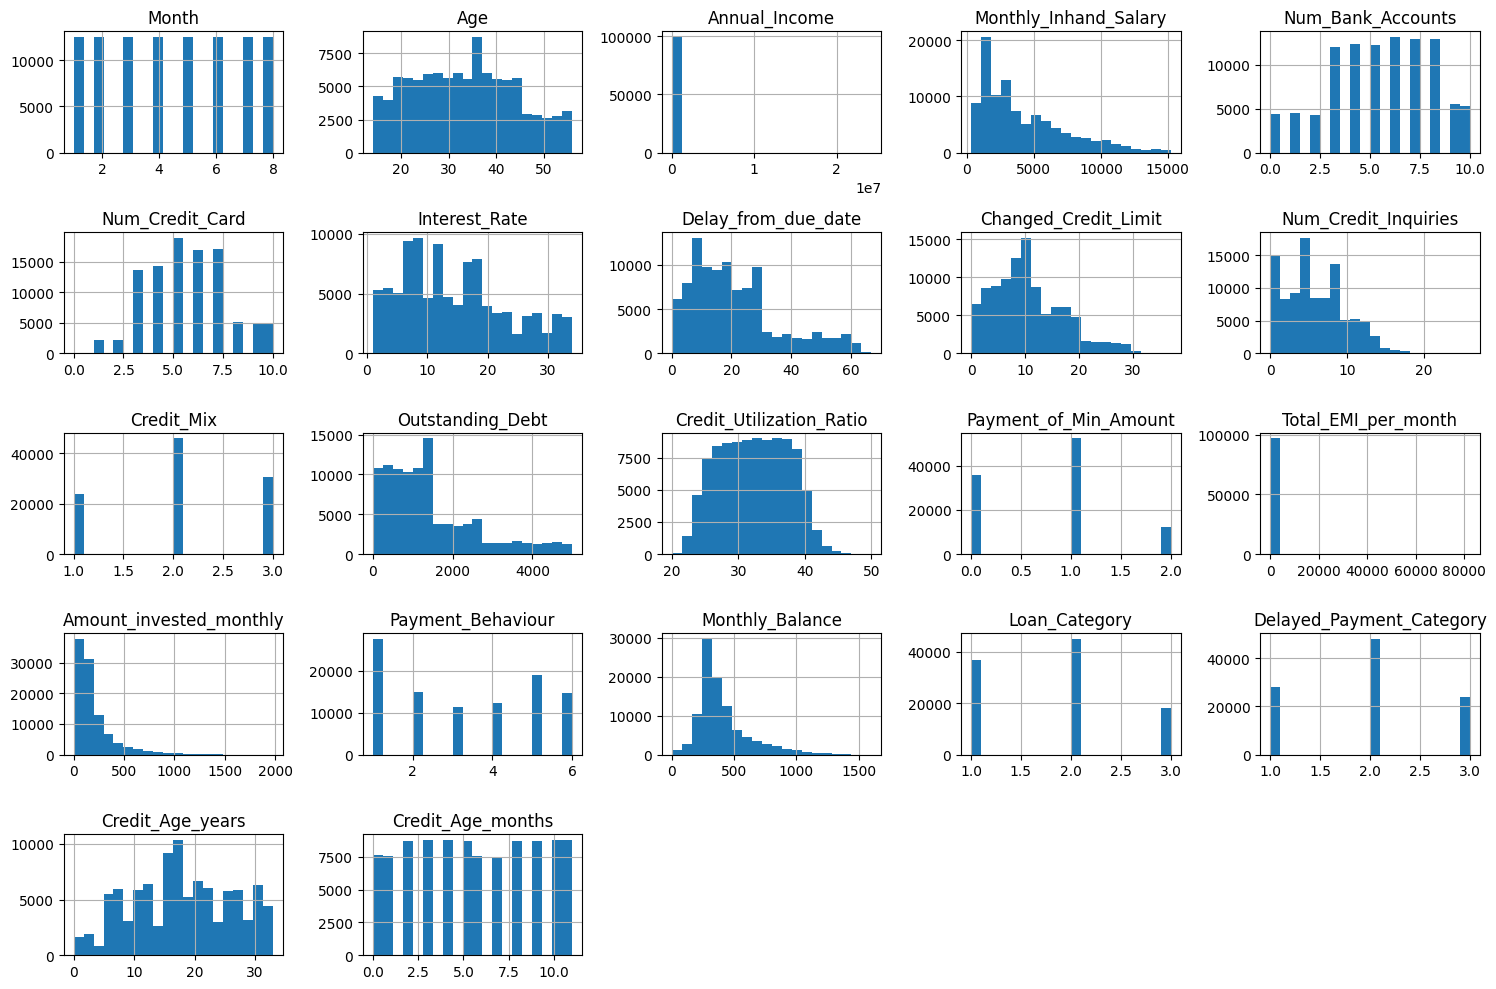

Month: A unique uniform distribution was observed, with 12,500 occurrences for each month. This indicated recurring interactions with a consistent set of customers each month.

Age: A slight right skew in the age distribution suggested the majority of clients were younger than 50, with a peak around 37.

Annual_Income: The dataset exhibited a wide range of income levels, with a mean of approximately 176,415 and numerous outliers, reflecting global income variations.

Monthly_Inhand_Salary: This column also displayed a right skew, with a mean of 4,198 and outliers due to global income disparities.

Num_Bank_Accounts, Num_Credit_Card, Credit_Utilization_Ratio, Credit_Age_Years: These columns exhibited bell-shaped distributions, indicating typical behaviors among clients.

Interest_Rate, Delay_from_due_date, Changed_Credit_limit, Num_Credit_Inquiries, Outstanding_Debt, Amount_Invested_Monthly, Monthly_Balance: These columns showed right-skewed distributions with a predominance of clients demonstrating conservative financial behaviors.

Payment_of_min_amount and Loan_Category: Most clients preferred a moderate number of loans, and the majority consistently paid the minimum required amount.

##Correlation Analysis (Heatmap)

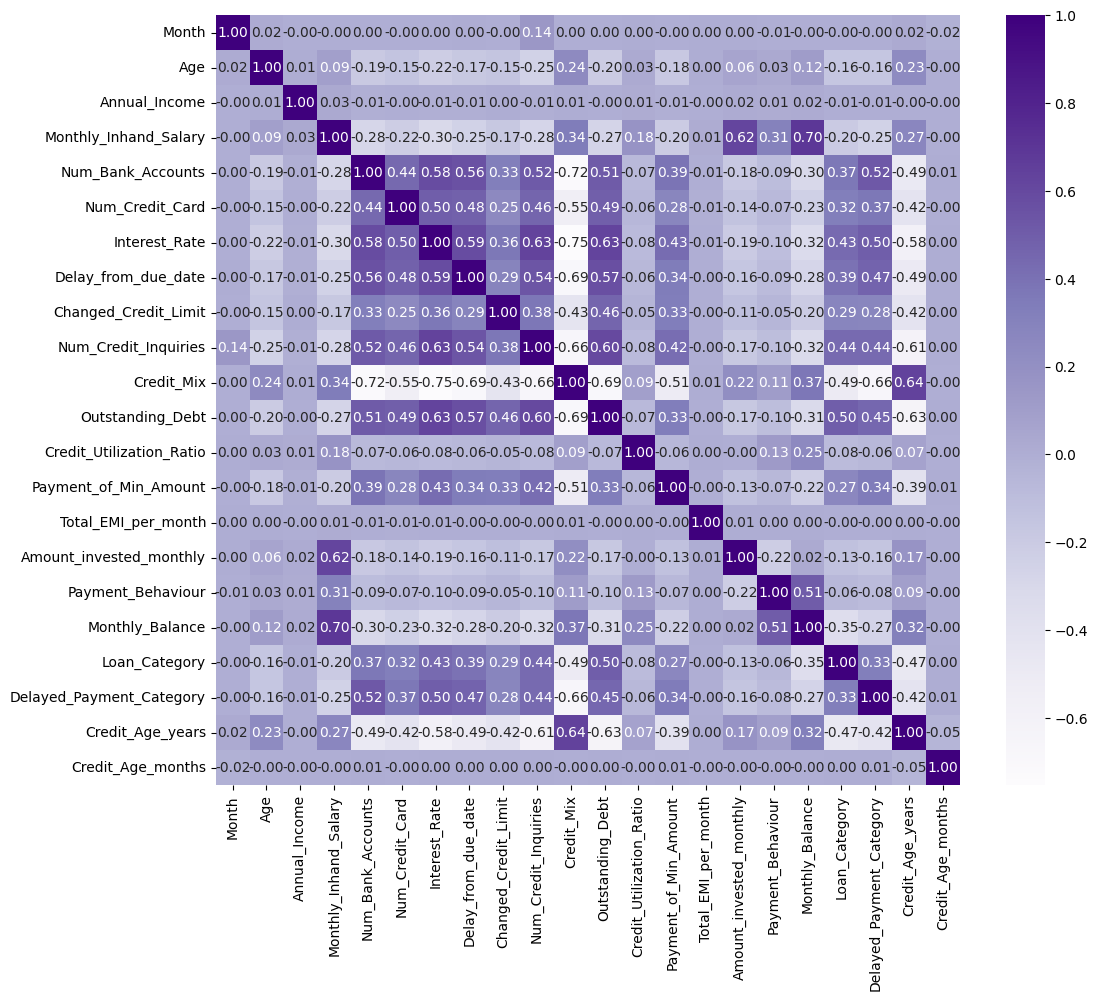

In our correlation map (heatmap), several noteworthy correlations emerged:

Positive correlations were observed between Monthly_Inhand_Salary and Amount_Invested_Monthly and between Monthly_Inhand_Salary and Monthly_Balance.

A positive correlation existed between Credit_Mix and Credit_Age_Years.

A smaller positive correlation was noted between Outstanding_Debt and both Interest_Rate and Delay_from_due_date.

#Conclusion

This comprehensive data cleaning and EDA process prepared the dataset for advanced analytics, predictive modeling, and the development of a credit score classification system. Insights gained from the EDA will guide further analyses and help the global finance company make informed data-driven decisions.

The retention of outliers in certain columns was justified by the company's global nature, which resulted in diverse financial behaviors among clients. The cleaned dataset is now ready for more advanced analytics and model development, contributing to the company's goal of reducing manual efforts through an intelligent credit score classification system. Subsequent stages of the project will involve further analysis and modeling.